# Predicting Chronic Kidney Disease: Data Wrangling

This project combines data from the Center for Disease Control's [500 Cities: Local Data for Better Health](https://www.cdc.gov/500cities/) and the U.S. Census Bureau's [American Community Survey 5-year Data](https://www.census.gov/data/developers/data-sets/acs-5year.html)(ACS). The 500 Cities Project contains 28,004 census tract-level observations on 5 unhealthy behaviors, 13 health outcomes, and 9 prevention practices ([see table below](#500-Cities-Health-Measures)). This dataset was originally download from Data.gov ([https://catalog.data.gov/dataset/500-cities-local-data-for-better-health-b32fd](https://catalog.data.gov/dataset/500-cities-local-data-for-better-health-b32fd)) on August 11, 2018.

The rate of chronic kidney disease (CKD) will serve as the target, while the prevention practices and ACS variables will serve as features. The ACS data provides 16,557 census-tract level variables. I have chosen 237 of those variables to serve as features. The ACS variables cover an array of demographic information in the categories of age, sex, race, disability status, education, marital status, health insurance coverage, and economic indicators. 

## 500 Cities Health Measures

|No| Prevention Measures                            | Unhealthy Behaviors               | Health Outcomes                |
|--|------------------------------------------------|-----------------------------------|--------------------------------|
|1 | Current lack of health insurance               | Binge drinking                    | Arthritis                      |
|2 | Routine checkup within the past year           | Current smoking                   | Asthma                         |
|3 | Visits to dentist or dental clinic             | No leisure-time physical activity | High blood pressure            |
|4 | Taking medicine for high blood pressure control| Obesity                           | Cancer (excluding skin cancer) |
|5 | Cholesterol screening                          | Sleeping less than 7 hours        | High cholesterol               | 
|6 | Mammography                                    | -                                 | Chronic kidney disease         |
|7 | Papanicolaou smear                             | -                   | Chronic obstructive pulmonary disease (COPD) |
|8 | Fecal occult blood test, sigmoidoscopy, or colonoscopy | -                         | Coronary heart disease         |
|9 | Older adults aged≥65 years who are up to date on a core set of clinical preventive services (male / female) |-| Diabetes |
|10| -                                              | -                          | Mental health not good for >= 14 days |
|11| -                                              | -                         | Physical health not good for >= 14 days|
|12| -                                              | -                   | All teeth lost among adults aged >= 65 years |
|13| -                                              | -                                  | Stroke                        | 



## Import Libraries

In [1241]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

sns.set()

# Census Bureau API key
API_KEY = 'XXXXXXXXXXXXX'

## CDC Data Acquisition & Wrangling

In [952]:
# create dataframe from 500 Cities dataset
cdc_df = pd.read_csv('data/500_Cities__Local_Data_for_Better_Health__2017_release.csv')

# create dataframe of tract-level data
cdc_df = cdc_df[cdc_df.GeographicLevel == 'Census Tract']

In [965]:
# pivot dataframe so each row is a census tract
cdc_pivot = cdc_df.pivot(index='UniqueID', columns='MeasureId', values='Data_Value')
cdc_pivot.reset_index(inplace=True, drop=False)
cdc_pivot.columns.name = None

In [966]:
cdc_pivot.head()

,UniqueID,ACCESS2,ARTHRITIS,BINGE,BPHIGH,BPMED,CANCER,CASTHMA,CHD,CHECKUP,...,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PAPTEST,PHLTH,SLEEP,STROKE,TEETHLOST
0,0107000-01073000100,23.9,32.5,10.1,46.2,80.0,5.2,12.7,8.0,76.3,...,3.6,42.3,74.2,18.8,46.7,76.0,19.6,50.4,5.5,30.2
1,0107000-01073000300,28.8,31.3,10.8,45.6,80.3,4.6,11.8,8.2,73.8,...,3.8,43.7,74.0,18.5,47.0,73.2,20.2,49.4,5.7,33.3
2,0107000-01073000400,26.1,34.6,9.5,50.1,82.0,5.2,13.0,8.8,77.5,...,4.0,44.9,73.6,19.1,48.8,72.8,21.1,52.5,6.5,36.0
3,0107000-01073000500,28.1,37.8,8.6,54.3,84.0,5.8,13.4,10.8,78.8,...,4.8,47.1,73.2,19.4,49.9,70.8,23.1,52.6,8.2,40.2
4,0107000-01073000700,31.8,38.5,7.4,55.4,83.3,5.7,14.3,11.9,78.7,...,5.7,50.8,70.5,21.6,52.8,67.6,25.8,54.1,9.6,45.8


In [967]:
cdc_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28004 entries, 0 to 28003
Data columns (total 29 columns):
UniqueID        28004 non-null object
ACCESS2         27203 non-null float64
ARTHRITIS       27204 non-null float64
BINGE           27204 non-null float64
BPHIGH          27204 non-null float64
BPMED           27204 non-null float64
CANCER          27204 non-null float64
CASTHMA         27204 non-null float64
CHD             27204 non-null float64
CHECKUP         27204 non-null float64
CHOLSCREEN      27204 non-null float64
COLON_SCREEN    27185 non-null float64
COPD            27204 non-null float64
COREM           27101 non-null float64
COREW           27095 non-null float64
CSMOKING        27204 non-null float64
DENTAL          27204 non-null float64
DIABETES        27204 non-null float64
HIGHCHOL        27204 non-null float64
KIDNEY          27204 non-null float64
LPA             27204 non-null float64
MAMMOUSE        27167 non-null float64
MHLTH           27204 non-null flo

In [983]:
cdc_ckd = cdc_pivot[['UniqueID','KIDNEY','CHECKUP','CHOLSCREEN','COLON_SCREEN',
                     'COREM','COREW','DENTAL','LPA','MAMMOUSE','PAPTEST','SLEEP']]

In [978]:
# create dataframe to merge with cdc_pivot
cdc_add = cdc_tract_df[['UniqueID','PopulationCount','GeoLocation',
                        'StateAbbr','CityName']].groupby('UniqueID', as_index=False).last()

In [984]:
# merge pivot table with additional CDC data
cdc_full = pd.merge(cdc_add, cdc_ckd.reset_index(drop=True), how='left', on='UniqueID')
cdc_full.head()

,UniqueID,PopulationCount,GeoLocation,StateAbbr,CityName,KIDNEY,CHECKUP,CHOLSCREEN,COLON_SCREEN,COREM,COREW,DENTAL,LPA,MAMMOUSE,PAPTEST,SLEEP
0,0107000-01073000100,3042.0,"(33.5794328326, -86.7228323926)",AL,Birmingham,3.6,76.3,72.3,54.2,28.2,25.2,40.9,42.3,74.2,76.0,50.4
1,0107000-01073000300,2735.0,"(33.5428208686, -86.752433978)",AL,Birmingham,3.8,73.8,69.8,51.3,25.7,22.7,39.0,43.7,74.0,73.2,49.4
2,0107000-01073000400,3338.0,"(33.5632449633, -86.7640474064)",AL,Birmingham,4.0,77.5,72.0,52.1,24.3,21.6,35.1,44.9,73.6,72.8,52.5
3,0107000-01073000500,2864.0,"(33.5442404594, -86.7749130719)",AL,Birmingham,4.8,78.8,71.9,52.0,22.2,19.5,32.7,47.1,73.2,70.8,52.6
4,0107000-01073000700,2577.0,"(33.5525406139, -86.8016893706)",AL,Birmingham,5.7,78.7,68.8,48.4,21.9,17.6,28.3,50.8,70.5,67.6,54.1


In [985]:
cdc_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28004 entries, 0 to 28003
Data columns (total 16 columns):
UniqueID           28004 non-null object
PopulationCount    27998 non-null float64
GeoLocation        28004 non-null object
StateAbbr          28004 non-null object
CityName           28004 non-null object
KIDNEY             27204 non-null float64
CHECKUP            27204 non-null float64
CHOLSCREEN         27204 non-null float64
COLON_SCREEN       27185 non-null float64
COREM              27101 non-null float64
COREW              27095 non-null float64
DENTAL             27204 non-null float64
LPA                27204 non-null float64
MAMMOUSE           27167 non-null float64
PAPTEST            27197 non-null float64
SLEEP              27204 non-null float64
dtypes: float64(12), object(4)
memory usage: 3.6+ MB


In [986]:
# pull TractID from UniqueID in order to merge with ACS data
cdc_full['TractID'] = cdc_full['UniqueID'].values
for i in range(len(cdc_full.TractID)):
    cdc_full.loc[i,'TractID'] = cdc_full.loc[i,'TractID'][8:]
    
# drop UniqueID
cdc_full.drop('UniqueID', axis=1, inplace=True)
cdc_full.head(3)

,PopulationCount,GeoLocation,StateAbbr,CityName,KIDNEY,CHECKUP,CHOLSCREEN,COLON_SCREEN,COREM,COREW,DENTAL,LPA,MAMMOUSE,PAPTEST,SLEEP,TractID
0,3042.0,"(33.5794328326, -86.7228323926)",AL,Birmingham,3.6,76.3,72.3,54.2,28.2,25.2,40.9,42.3,74.2,76.0,50.4,01073000100
1,2735.0,"(33.5428208686, -86.752433978)",AL,Birmingham,3.8,73.8,69.8,51.3,25.7,22.7,39.0,43.7,74.0,73.2,49.4,01073000300
2,3338.0,"(33.5632449633, -86.7640474064)",AL,Birmingham,4.0,77.5,72.0,52.1,24.3,21.6,35.1,44.9,73.6,72.8,52.5,01073000400


In [987]:
# rename columns
col_names = ['Population', 'GeoLocation', 'State', 'City', 
             'CKD', 'CHECKUP', 'CHOLSCREEN', 'COLON_SCREEN',
             'COREM', 'COREW', 'DENTAL', 'LPA', 'MAMMOUSE', 
             'PAPTEST', 'SLEEP', 'TractID']
cdc_full.columns = col_names

In [990]:
# fill missing values
for col in list(cdc_full.columns)[4:]:
    cdc_full[col] = cdc_full[col].fillna(cdc_full[col].mean())
cdc_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28004 entries, 0 to 28003
Data columns (total 16 columns):
Population      28004 non-null float64
GeoLocation     28004 non-null object
State           28004 non-null object
City            28004 non-null object
CKD             28004 non-null float64
CHECKUP         28004 non-null float64
CHOLSCREEN      28004 non-null float64
COLON_SCREEN    28004 non-null float64
COREM           28004 non-null float64
COREW           28004 non-null float64
DENTAL          28004 non-null float64
LPA             28004 non-null float64
MAMMOUSE        28004 non-null float64
PAPTEST         28004 non-null float64
SLEEP           28004 non-null float64
TractID         28004 non-null object
dtypes: float64(12), object(4)
memory usage: 4.9+ MB


## ACS Data Acquisition & Wrangling

In [2]:
# get Census variable data
r = requests.get('https://api.census.gov/data/2015/acs/acs5/subject/variables.json')
acs_vars = r.json()
acs_df = pd.DataFrame(acs_vars['variables'])
acs_df = acs_df.transpose().sort_index().reset_index()

In [719]:
# create ACS variables dataframe w/ unneccessary columns dropped
var_cols = ['index','concept', 'label']
variable_df = acs_df.loc[:, var_cols]

# list of concepts to keep in dataframe
concepts = ['AGE AND SEX', 'HOUSEHOLDS AND FAMILIES', 'MARITAL STATUS',
            'EDUCATIONAL ATTAINMENT', 'POVERTY STATUS IN THE PAST 12 MONTHS',
            'DISABILITY CHARACTERISTICS','EMPLOYMENT STATUS', 'WORK STATUS IN THE PAST 12 MONTHS',
            'OCCUPATION BY SEX FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER',
            'OCCUPANCY CHARACTERISTICS','FINANCIAL CHARACTERISTICS',
            'SELECTED CHARACTERISTICS OF HEALTH INSURANCE COVERAGE IN THE UNITED STATES',
            'PRIVATE HEALTH INSURANCE COVERAGE BY TYPE', 'PUBLIC HEALTH INSURANCE COVERAGE BY TYPE']

# list of labels to drop from dataframe
drop_labels = ['SELECTED AGE CATEGORIES', 'SUMMARY INDICATORS', 'PERCENT IMPUTED',
               'AGE OF OWN CHILDREN', 'SELECTED HOUSEHOLDS BY TYPE', 'UNITS IN STRUCTURE',
               'Married-couple families'
              ]

# filter variable df
variable_df = variable_df[variable_df.concept.isin(concepts)]

for lab in drop_labels:
    variable_df = variable_df[~variable_df.label.str.contains(lab)]
    
# make labels easier to read
variable_df['label'] = variable_df['label'].str.replace('!!Estimate!!',' | ').str.replace('!!',' | ')

# drop unwanted variables
to_drop = list(range(23,42))              # total population age
to_drop.extend([59,95])                   # total population sex
to_drop.extend(list(range(8156,8160)))    # households and families totals
to_drop.extend([8164,8169,8170,8184])     # total households
to_drop.extend(list(range(8174,8180)))    # households and families subgroupings (totals)
to_drop.extend(list(range(8194,8200)))    # households and families subgroupings
to_drop.extend([8204,8214,8214,8215,
                8216,8217,8218,8219,
                8224,8244])               # households and families subgroupings
to_drop.extend(list(range(8234,8240)))    # households and families subgroupings
to_drop.extend(list(range(8256,8286)))    # redundant population counts
to_drop.extend(list(range(8288,8317)))    # now married subgroupings
to_drop.extend(list(range(8319,8344)))    # widowed age and sex subgroupings
to_drop.extend(list(range(8344,8348)))    # widowed labor force subgroupings
to_drop.extend(list(range(8349,8364)))    # divorced age and sex subgroupings
to_drop.extend(list(range(8365,8379)))    # divorced labor force subgroupings
to_drop.extend(list(range(8381,8396)))    # separated age and sex subgroupings
to_drop.extend(list(range(8396,8410)))    # separated labor force subgroupings
to_drop.extend(list(range(8412,8441)))    # never married labor force subgroupings
to_drop.extend(list(range(8876,8941)))    # educational attainment subgroupings (totals)
to_drop.extend([8945])                    # Pct 25 and over
to_drop.extend(list(range(8953,9260)))    # educational attainment subgroupings (pct)
to_drop.extend(list(range(9680,9803)))    # poverty status groupings (totals)
to_drop.extend(list(range(9823,9839)))    # poverty status groupings(pct)
to_drop.extend(list(range(9847,9850)))    # poverty status unrelated individuals
to_drop.extend(list(range(9859,9863)))    # poverty status subgroupings
to_drop.extend(list(range(10303,10442)))  # disability characteristics subgroupings (totals)
to_drop.extend(list(range(10444,10459)))  # disability characteristics age and race groupings
to_drop.extend(list(range(10460,10469)))  # hearing difficulty age groupings
to_drop.extend(list(range(10470,10479)))  # visual difficulty age groupings
to_drop.extend(list(range(10480,10487)))  # cognitive difficulty age groupings
to_drop.extend(list(range(10488,10495)))  # ambulatory difficulty age groupings
to_drop.extend(list(range(10496,10503)))  # self-care difficulty age groupings
to_drop.extend(list(range(10504,10510)))  # independent living difficulty age groupings
to_drop.extend(list(range(11683,11718)))  # employment status subgroupings (totals)
to_drop.extend(list(range(11719,11788)))  # labor force participation subgroupings
to_drop.extend(list(range(11789,11823)))  # unemployment rate subgroupings
to_drop.extend(list(range(11943,11977)))  # work status subgroupings (totals)
to_drop.extend(list(range(12005,12008)))  # work status subgroupings
to_drop.extend(list(range(12009,12141)))  # work status sex subgroupings
to_drop.extend(list(range(12141,12213)))  # occupation subgroupings (totals)
to_drop.extend(list(range(12214,12216)))  # occupation subgroupings
to_drop.extend(list(range(12214,12216)))  # occupation subgroupings
to_drop.extend([12218,12222,12227,12230,
                12232,12238,12241,12245]) # occupation subgroupings male
to_drop.extend(list(range(12249,12288)))  # occupations subgroupings female (totals)
to_drop.extend([12290,12299,12302,12304,
                12310,12314,12317])       # occupations subgroupings female
to_drop.extend(list(range(13659,13668)))  # occupancy subgroupings (totals)
to_drop.extend(list(range(13669,13672)))  # occupancy subgroupings
to_drop.extend(list(range(13690,13697)))  # occupancy subgroupings
to_drop.extend(list(range(13698,13735)))  # occupancy subgroupings
to_drop.extend(list(range(13736,13773)))  # occupancy subgroupings
to_drop.extend([13854])                   # financial characteristics subgroupings
to_drop.extend(list(range(13866,13878)))  # monthly housing cost subgroupings
to_drop.extend(list(range(13900,13992)))  # monthly housing cost subgroupings
to_drop.extend(list(range(15641,15766)))  # health insurance subgroupings (totals)
to_drop.extend(list(range(15767,15769)))  # health insurance subgroupings (insured)
to_drop.extend(list(range(15770,15775)))  # health insurance subgroupings
to_drop.extend(list(range(15776,15890)))  # health insurance subgroupings
to_drop.extend(list(range(15891,15893)))  # health insurance subgroupings (uninsured)
to_drop.extend(list(range(15894,15899)))  # health insurance subgroupings (uninsured)
to_drop.extend(list(range(15900,15951)))  # health insurance subgroupings (uninsured)
to_drop.extend(list(range(16371,16431)))  # private insurance subgroupings (totals)
to_drop.extend(list(range(16434,16516)))  # public insurance subgroupings
to_drop.extend(list(range(16519,16542)))  # public insurance subgroupings
variable_df = variable_df.drop(to_drop)

In [766]:
# reset variable df columns names and index
variable_df.columns = ['api_call','concept','label']
variable_df.reset_index(inplace=True, drop=True)

In [911]:
# create df of Tract IDs
tracts = cdc_full[['TractID']].copy()

# create list of ACS subject codes
subjects = list(variable_df.api_call)

In [777]:
# create function to call ACS API for each state and return a dataframe
def acs_api_to_df(subjects=subjects, state='01', key=API_KEY, tracts=tracts):
    '''
    This function will pull the desired variable data for all
    census tracts in a given state from the American Community
    Survey 5-year Data and return a pandas dataframe matching a
    predefined list of census tracts.
    
    subjects = a list of desired subject codes to include in API call
    state = the two-digit code of the desired U.S. state, District of
            Columbia, or Puerto Rico
    key = the user's Census Bureau API key
    tracts = a pandas Series or DataFrame containing TractID with
             unique, desired census tracts
    '''
    
    # call API
    req = requests.get('https://api.census.gov/data/2015/acs/acs5/subject?get='
                   + subjects[0] +'&for=tract:*&in=state:'
                   + state + '&key='
                   + API_KEY
                  )
    acs_data = req.json()
    
    # initialize dataframe
    headers = acs_data.pop(0)
    acs_df = pd.DataFrame(acs_data, columns=headers)
    acs_df['TractID'] = acs_df['state'] + acs_df['county'] + acs_df['tract']
    
    for sub in subjects[1:]:
        req = requests.get('https://api.census.gov/data/2015/acs/acs5/subject?get='
                           + sub + '&for=tract:*&in=state:'
                           + state + '&key=' 
                           + API_KEY
                          )
        sub_data = req.json()
        
        # read subject data into dataframe
        header = sub_data.pop(0)
        sub_df = pd.DataFrame(sub_data, columns=header)
        sub_df['TractID'] = sub_df['state'] + sub_df['county'] + sub_df['tract']
        
        # merge subject dataframe with ACS dataframe
        acs_df = pd.merge(acs_df, sub_df, on=['TractID','state','county','tract'])
        
        # extract unwanted tract data
        trunc_df = pd.merge(tracts, acs_df, how='inner', on='TractID')
        
    return trunc_df

In [912]:
# pull state data from ACS API
alabama = acs_api_to_df(state='01')
alaska = acs_api_to_df(state='02')
arizona = acs_api_to_df(state='04')

In [913]:
california = acs_api_to_df(state='06')
colorado = acs_api_to_df(state='08')
connecticut = acs_api_to_df(state='09')

In [914]:
delaware = acs_api_to_df(state='10')
dist_of_columbia = acs_api_to_df(state='11')
florida = acs_api_to_df(state='12')

In [915]:
georgia = acs_api_to_df(state='13')
hawaii = acs_api_to_df(state='15')
idaho = acs_api_to_df(state='16')

In [916]:
illinois = acs_api_to_df(state='17')
indiana = acs_api_to_df(state='18')
iowa =acs_api_to_df(state='19')

In [917]:
kansas = acs_api_to_df(state='20')
kentucky = acs_api_to_df(state='21')
louisiana = acs_api_to_df(state='22')

In [918]:
maine = acs_api_to_df(state='23')
maryland = acs_api_to_df(state='24')
massachusetts= acs_api_to_df(state='25')

In [919]:
michigan = acs_api_to_df(state='26')
minnesota = acs_api_to_df(state='27')
mississippi= acs_api_to_df(state='28')

In [920]:
missouri = acs_api_to_df(state='29')
montana = acs_api_to_df(state='30')
nebraska = acs_api_to_df(state='31')

In [921]:
nevada = acs_api_to_df(state='32')
new_hampshire = acs_api_to_df(state='33')
new_jersey = acs_api_to_df(state='34')

In [922]:
new_mexico = acs_api_to_df(state='35')
new_york = acs_api_to_df(state='36')
north_carolina = acs_api_to_df(state='37')

In [923]:
north_dakota = acs_api_to_df(state='38')
ohio = acs_api_to_df(state='39')
oklahoma = acs_api_to_df(state='40')

In [924]:
oregon = acs_api_to_df(state='41')
pennsylvania = acs_api_to_df(state='42')
rhode_island = acs_api_to_df(state='44')

In [925]:
south_carolina = acs_api_to_df(state='45')
south_dakota = acs_api_to_df(state='46')
tennessee = acs_api_to_df(state='47')

In [926]:
texas = acs_api_to_df(state='48')
utah = acs_api_to_df(state='49')
vermont = acs_api_to_df(state='50')

In [927]:
virginia = acs_api_to_df(state='51')
washington = acs_api_to_df(state='53')
west_virginia = acs_api_to_df(state='54')

In [928]:
wisconsin = acs_api_to_df(state='55')
wyoming = acs_api_to_df(state='56')

In [929]:
arkansas = acs_api_to_df(state='05')

In [930]:
# create list of state dataframes
state_dfs = [alabama, alaska, arizona, arkansas, california, colorado, 
             connecticut, delaware, dist_of_columbia, florida, georgia,
             hawaii, idaho, illinois, indiana, iowa, kansas, kentucky, 
             louisiana, maine, maryland, massachusetts, michigan, 
             minnesota, mississippi, missouri, montana, nebraska,
             nevada, new_hampshire, new_jersey, new_mexico, new_york,
             north_carolina, north_dakota, ohio, oklahoma, oregon,
             pennsylvania, rhode_island, south_carolina, south_dakota,
             tennessee, texas, utah, vermont, virginia, washington, 
             west_virginia, wisconsin, wyoming
            ]

# combine all states into one dataframe
full_acs_df = pd.concat(state_dfs)

# export ACS data to csv
full_acs_df.to_csv('data/acs_data.csv')

In [931]:
full_acs_df.head()

,TractID,S0101_C02_002E,state,county,tract,S0101_C02_003E,S0101_C02_004E,S0101_C02_005E,S0101_C02_006E,S0101_C02_007E,...,S2701_C03_011E,S2701_C05_002E,S2701_C05_005E,S2701_C05_011E,S2703_C03_003E,S2703_C03_004E,S2703_C03_005E,S2704_C03_003E,S2704_C03_004E,S2704_C03_005E
0,01073000100,5.3,01,073,000100,14.0,6.4,13.2,6.3,10.9,...,100.0,11.0,43.0,0.0,25.1,0.6,0.8,5.6,23.5,0.7
1,01073000300,8.0,01,073,000300,9.5,6.7,6.3,3.5,8.4,...,100.0,10.9,33.7,0.0,21.6,1.3,0.0,6.0,30.9,0.0
2,01073000400,8.7,01,073,000400,7.1,10.9,2.7,8.9,14.3,...,100.0,1.2,32.5,0.0,18.5,2.0,0.6,10.7,31.8,0.5
3,01073000500,9.3,01,073,000500,14.9,9.3,6.7,3.1,3.1,...,100.0,11.4,25.2,0.0,22.2,3.6,0.3,6.2,29.3,0.7
4,01073000700,20.4,01,073,000700,14.3,12.5,5.4,8.7,6.2,...,100.0,2.2,33.1,0.0,14.9,1.3,0.4,4.7,44.8,0.0


In [932]:
full_acs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27764 entries, 0 to 15
Columns: 260 entries, TractID to S2704_C03_005E
dtypes: object(260)
memory usage: 55.3+ MB


In [933]:
# convert columns to numerical data
acs_columns = list(full_acs_df.columns)
full_acs_df[acs_columns] = full_acs_df[acs_columns].apply(pd.to_numeric, errors='coerce')
full_acs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27764 entries, 0 to 15
Columns: 260 entries, TractID to S2704_C03_005E
dtypes: float64(252), int64(8)
memory usage: 55.3 MB


In [934]:
full_acs_df.select_dtypes(include='int64').head()

,TractID,state,county,tract,S1101_C02_014E,S1101_C02_015E,S2501_C02_001E,S2501_C03_001E
0,1073000100,1,73,100,-888888888,-888888888,585,673
1,1073000300,1,73,300,-888888888,-888888888,228,688
2,1073000400,1,73,400,-888888888,-888888888,591,545
3,1073000500,1,73,500,-888888888,-888888888,433,855
4,1073000700,1,73,700,-888888888,-888888888,282,628


In [829]:
list(variable_df[variable_df.api_call == 'S1101_C02_014E']['label'])

['Married-couple family household | UNMARRIED-PARTNER HOUSEHOLDS | Same sex']

In [831]:
full_acs_df['S1101_C02_015E'].unique()

array([-888888888], dtype=int64)

In [935]:
# drop completely empty columns
full_acs_df.drop(['S1101_C02_014E', 'S1101_C02_015E'], axis=1, inplace=True)

In [1004]:
# convert negative numbers to NaN
full_acs_df[full_acs_df < 0] = np.nan

In [1014]:
full_acs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27764 entries, 0 to 15
Columns: 258 entries, TractID to S2704_C03_005E
dtypes: float64(252), int64(6)
memory usage: 54.9 MB


In [1016]:
full_acs_df = full_acs_df.dropna(thresh=5553, axis=1)
full_acs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27764 entries, 0 to 15
Columns: 241 entries, TractID to S2704_C03_005E
dtypes: float64(235), int64(6)
memory usage: 51.3 MB


In [1017]:
# fill missing ACS data with the median of each column
for col in list(full_acs_df.columns):
    full_acs_df[col].fillna((full_acs_df[col].mean()), inplace=True)

In [1038]:
var_labels = dict(zip(variable_df.api_call,variable_df.label))
tract_info = ['TractID','state','county','tract']
for each in tract_info:
    var_labels[each] = each
full_acs_df.rename(var_labels, axis='columns', inplace=True)
full_acs_df.head(3)

,TractID,Male | AGE | Under 5 years,state,county,tract,Male | AGE | 5 to 9 years,Male | AGE | 10 to 14 years,Male | AGE | 15 to 19 years,Male | AGE | 20 to 24 years,Male | AGE | 25 to 29 years,...,Percent Insured | AGE | 65 years and older,Percent Uninsured | AGE | Under 18 years,Percent Uninsured | AGE | 18 to 64 years,Percent Uninsured | AGE | 65 years and older,Percent Private Coverage | COVERAGE ALONE | Private health insurance alone | Employer-based health insurance alone,Percent Private Coverage | COVERAGE ALONE | Private health insurance alone | Direct-purchase health insurance alone,Percent Private Coverage | COVERAGE ALONE | Private health insurance alone | Tricare/military health coverage alone,Percent Public Coverage | COVERAGE ALONE | Public health insurance alone | Medicare coverage alone,Percent Public Coverage | COVERAGE ALONE | Public health insurance alone | Medicaid/means tested coverage alone,Percent Public Coverage | COVERAGE ALONE | Public health insurance alone | VA health care coverage alone
0,1073000100,5.3,1,73,100,14.0,6.4,13.2,6.3,10.9,...,100.0,11.0,43.0,0.0,25.1,0.6,0.8,5.6,23.5,0.7
1,1073000300,8.0,1,73,300,9.5,6.7,6.3,3.5,8.4,...,100.0,10.9,33.7,0.0,21.6,1.3,0.0,6.0,30.9,0.0
2,1073000400,8.7,1,73,400,7.1,10.9,2.7,8.9,14.3,...,100.0,1.2,32.5,0.0,18.5,2.0,0.6,10.7,31.8,0.5


In [1142]:
col_names = list(full_acs_df.columns)
col_names = [col.replace('Male','M').replace('| AGE | ','')
             .replace(' years','').replace(' to ','to')
             .replace('Female','F').replace('Nonfamily household | HOUSING TENURE | ','')
             .replace(' housing units','')
             .replace('Now married (except separated) | Population 15 and over','Married')
             .replace(' | Population 15 and over','')
             .replace('Percent | Population ','')
             .replace(' | Less than high school graduate','_less_than_HS')
             .replace(' | High school graduate (includes equivalency)','_HS_grad')
             .replace(' | Some college or associate\'s degree','_some_college_or_associates')
             .replace(' | Bachelor\'s degree or higher','_bachelors_or_higher')
             .replace(' | Less than 9th grade','_less_than_9th_grade')
             .replace(' | 9thto12th grade, no diploma','_9to12_no_diploma')
             .replace(' | Some college, no degree','_some_college_no_degree')
             .replace(' | Associate\'s degree','_associates_degree')
             .replace(' | Bachelor\'s degree','_bachelors_degree')
             .replace(' | Graduate or professional degree','_graduate_or_prof_degree')
             .replace('Percent below poverty level','Below_poverty')
             .replace(' | ','_')
             .replace('RACE AND HISPANIC OR LATINO ORIGIN_','')
             .replace(' (of any race)','')
             .replace(', not Hispanic or Latino','_not_Hispanic')
             .replace('Percent with a ','With_a_')
             .replace('DISABILITY TYPE BY DETAILED AGE_With a ','')
             .replace('DISABILITY TYPE BY DETAILED AGE_With an ','')
             .replace('SEX_','')
             .replace('_Population 16 and over','')
             .replace('Percent Total_WEEKS WORKED_Worked ','Weeks_Worked_')
             .replace('Percent Total_','')
             .replace('USUAL HOURS WORKED_Usually worked 35 or more hours per week','Weekly_Hours_Worked_35_or_more')
             .replace('USUAL HOURS WORKED_Usually worked 15to34 hours per week','Weekly_Hours_Worked_15to34')
             .replace('USUAL HOURS WORKED_Usually worked 1to14 hours per week','Weekly_Hours_Worked_1to14')
             .replace('Workers 16to64 who worked full-time, year-round','Worked_full-time_year-round')
             .replace('Percent ','').replace('|','')
             .replace('Management, business, science, and arts occupations_Management, business, and financial occupations_','')
             .replace('Management, business, science, and arts occupations_Computer, engineering, and science occupations_','')
             .replace('Management, business, science, and arts occupations_Education, legal, community service, arts, and media occupations_','')
             .replace('Management, business, science, and arts occupations_Healthcare practitioner and technical occupations_','')
             .replace('Service occupations_Protective service occupations_Fire fighting and prevention, and other protective service workers including supervisors',
                     'Fire_fighting_and_prevention')
             .replace('Service occupations_Protective service occupations_Law enforcement workers including supervisors',
                     'Law_enforcement')
             .replace('Service occupations_Food preparation and serving related occupations','Food_service')
             .replace('Service occupations_Building and grounds cleaning and maintenance occupations',
                     'Building and grounds maintenance')
             .replace('Service occupations_Personal care and service occupations','Personal_care')
             .replace('Sales and office occupations_','')
             .replace('Natural resources, construction, and maintenance occupations_','')
             .replace('Production, transportation, and material moving occupations_','')
             .replace('Management, business, science, and arts occupations_Education, legal, community service, arts, and media occupations',
                     'Education_legal_community_service_arts_media')
             .replace('Occupied_HOUSEHOLD TYPE (INCLUDING LIVING ALONE) AND AGE OF HOUSEHOLDER_','')
             .replace(' family','').replace('Householder ','')
             .replace('Occupied_HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS)','Household_income')
             .replace('$','').replace(',000','K').replace('99,999','100K').replace('14,999','15K').replace('19,999','20K')
             .replace('24,999','25K').replace('34,999','35K').replace('49,999','50K').replace('74,999','75K')
             .replace('9,999','10K')
             .replace('Occupied_MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS',
                     'Housing_costs_pct_of_income')
             .replace('percent','pct')
             .replace('COVERAGE ALONE_Private health insurance alone_','')
             .replace('COVERAGE ALONE_Public health insurance alone_','')
             .replace(' health insurance alone','')
             .replace('/military health coverage alone','')
             .replace('/means tested coverage alone','')
             .replace(' ','_')
             for col in col_names]
col_names

['TractID',
 'M_Under_5',
 'state',
 'county',
 'tract',
 'M_5to9',
 'M_10to14',
 'M_15to19',
 'M_20to24',
 'M_25to29',
 'M_30to34',
 'M_35to39',
 'M_40to44',
 'M_45to49',
 'M_50to54',
 'M_55to59',
 'M_60to64',
 'M_65to69',
 'M_70to74',
 'M_75to79',
 'M_80to84',
 'M_85_and_over',
 'F_Under_5',
 'F_5to9',
 'F_10to14',
 'F_15to19',
 'F_20to24',
 'F_25to29',
 'F_30to34',
 'F_35to39',
 'F_40to44',
 'F_45to49',
 'F_50to54',
 'F_55to59',
 'F_60to64',
 'F_65to69',
 'F_70to74',
 'F_75to79',
 'F_80to84',
 'F_85_and_over',
 'Owner-occupied',
 'Renter-occupied',
 'Married',
 'Widowed',
 'Divorced',
 'Separated',
 'Never_married',
 '18to24_less_than_HS',
 '18to24_HS_grad',
 '18to24_some_college_or_associates',
 '18to24_bachelors_or_higher',
 '25_and_over_less_than_9th_grade',
 '25_and_over_9to12_no_diploma',
 '25_and_over_HS_grad',
 '25_and_over_some_college_no_degree',
 '25_and_over_associates_degree',
 '25_and_over_bachelors_degree',
 '25_and_over_graduate_or_prof_degree',
 'Below_poverty_Under_

In [1143]:
full_acs_df.columns = col_names
full_acs_df.head()

,TractID,M_Under_5,state,county,tract,M_5to9,M_10to14,M_15to19,M_20to24,M_25to29,...,Insured_65_and_older,Uninsured_Under_18,Uninsured_18to64,Uninsured_65_and_older,Private_Coverage_Employer-based,Private_Coverage_Direct-purchase,Private_Coverage_Tricare,Public_Coverage_Medicare_coverage_alone,Public_Coverage_Medicaid,Public_Coverage_VA_health_care_coverage_alone
0,1073000100,5.3,1,73,100,14.0,6.4,13.2,6.3,10.9,...,100.0,11.0,43.0,0.0,25.1,0.6,0.8,5.6,23.5,0.7
1,1073000300,8.0,1,73,300,9.5,6.7,6.3,3.5,8.4,...,100.0,10.9,33.7,0.0,21.6,1.3,0.0,6.0,30.9,0.0
2,1073000400,8.7,1,73,400,7.1,10.9,2.7,8.9,14.3,...,100.0,1.2,32.5,0.0,18.5,2.0,0.6,10.7,31.8,0.5
3,1073000500,9.3,1,73,500,14.9,9.3,6.7,3.1,3.1,...,100.0,11.4,25.2,0.0,22.2,3.6,0.3,6.2,29.3,0.7
4,1073000700,20.4,1,73,700,14.3,12.5,5.4,8.7,6.2,...,100.0,2.2,33.1,0.0,14.9,1.3,0.4,4.7,44.8,0.0


## CDC Data Wrangling, Part II

In [991]:
cdc_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28004 entries, 0 to 28003
Data columns (total 16 columns):
Population      28004 non-null float64
GeoLocation     28004 non-null object
State           28004 non-null object
City            28004 non-null object
CKD             28004 non-null float64
CHECKUP         28004 non-null float64
CHOLSCREEN      28004 non-null float64
COLON_SCREEN    28004 non-null float64
COREM           28004 non-null float64
COREW           28004 non-null float64
DENTAL          28004 non-null float64
LPA             28004 non-null float64
MAMMOUSE        28004 non-null float64
PAPTEST         28004 non-null float64
SLEEP           28004 non-null float64
TractID         28004 non-null object
dtypes: float64(12), object(4)
memory usage: 4.9+ MB


In [992]:
# convert CDC TractID to integer
cdc_full['TractID'] = pd.to_numeric(cdc_full['TractID'], downcast='integer')

# convert State and City to categorical
cdc_full['State'] = cdc_full['State'].astype('category')
cdc_full['City'] = cdc_full['City'].astype('category')

cdc_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28004 entries, 0 to 28003
Data columns (total 16 columns):
Population      28004 non-null float64
GeoLocation     28004 non-null object
State           28004 non-null category
City            28004 non-null category
CKD             28004 non-null float64
CHECKUP         28004 non-null float64
CHOLSCREEN      28004 non-null float64
COLON_SCREEN    28004 non-null float64
COREM           28004 non-null float64
COREW           28004 non-null float64
DENTAL          28004 non-null float64
LPA             28004 non-null float64
MAMMOUSE        28004 non-null float64
PAPTEST         28004 non-null float64
SLEEP           28004 non-null float64
TractID         28004 non-null int64
dtypes: category(2), float64(12), int64(1), object(1)
memory usage: 4.6+ MB


In [994]:
cdc_full.drop_duplicates(['TractID'], inplace=True)
cdc_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27521 entries, 0 to 28003
Data columns (total 16 columns):
Population      27521 non-null float64
GeoLocation     27521 non-null object
State           27521 non-null category
City            27521 non-null category
CKD             27521 non-null float64
CHECKUP         27521 non-null float64
CHOLSCREEN      27521 non-null float64
COLON_SCREEN    27521 non-null float64
COREM           27521 non-null float64
COREW           27521 non-null float64
DENTAL          27521 non-null float64
LPA             27521 non-null float64
MAMMOUSE        27521 non-null float64
PAPTEST         27521 non-null float64
SLEEP           27521 non-null float64
TractID         27521 non-null int64
dtypes: category(2), float64(12), int64(1), object(1)
memory usage: 3.3+ MB


In [1146]:
cdc_full = cdc_full[['TractID','Population','GeoLocation',
                     'State','City','CKD','CHECKUP','CHOLSCREEN',
                     'COLON_SCREEN','COREM','COREW','DENTAL',
                     'LPA','MAMMOUSE','PAPTEST','SLEEP']]

## Merge Data

In [1147]:
# merge the ACS and CDC dataframes
complete_df = pd.merge(cdc_full, full_acs_df, on='TractID')
complete_df.head()

,TractID,Population,GeoLocation,State,City,CKD,CHECKUP,CHOLSCREEN,COLON_SCREEN,COREM,...,Insured_65_and_older,Uninsured_Under_18,Uninsured_18to64,Uninsured_65_and_older,Private_Coverage_Employer-based,Private_Coverage_Direct-purchase,Private_Coverage_Tricare,Public_Coverage_Medicare_coverage_alone,Public_Coverage_Medicaid,Public_Coverage_VA_health_care_coverage_alone
0,1073000100,3042.0,"(33.5794328326, -86.7228323926)",AL,Birmingham,3.6,76.3,72.3,54.2,28.2,...,100.0,11.0,43.0,0.0,25.1,0.6,0.8,5.6,23.5,0.7
1,1073000300,2735.0,"(33.5428208686, -86.752433978)",AL,Birmingham,3.8,73.8,69.8,51.3,25.7,...,100.0,10.9,33.7,0.0,21.6,1.3,0.0,6.0,30.9,0.0
2,1073000400,3338.0,"(33.5632449633, -86.7640474064)",AL,Birmingham,4.0,77.5,72.0,52.1,24.3,...,100.0,1.2,32.5,0.0,18.5,2.0,0.6,10.7,31.8,0.5
3,1073000500,2864.0,"(33.5442404594, -86.7749130719)",AL,Birmingham,4.8,78.8,71.9,52.0,22.2,...,100.0,11.4,25.2,0.0,22.2,3.6,0.3,6.2,29.3,0.7
4,1073000700,2577.0,"(33.5525406139, -86.8016893706)",AL,Birmingham,5.7,78.7,68.8,48.4,21.9,...,100.0,2.2,33.1,0.0,14.9,1.3,0.4,4.7,44.8,0.0


In [1148]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27764 entries, 0 to 27763
Columns: 256 entries, TractID to Public_Coverage_VA_health_care_coverage_alone
dtypes: category(2), float64(247), int64(6), object(1)
memory usage: 54.1+ MB


In [1149]:
complete_df.drop_duplicates(['TractID'], inplace=True)
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27408 entries, 0 to 27763
Columns: 256 entries, TractID to Public_Coverage_VA_health_care_coverage_alone
dtypes: category(2), float64(247), int64(6), object(1)
memory usage: 53.4+ MB


In [1150]:
complete_df.describe()

,TractID,Population,CKD,CHECKUP,CHOLSCREEN,COLON_SCREEN,COREM,COREW,DENTAL,LPA,...,Insured_65_and_older,Uninsured_Under_18,Uninsured_18to64,Uninsured_65_and_older,Private_Coverage_Employer-based,Private_Coverage_Direct-purchase,Private_Coverage_Tricare,Public_Coverage_Medicare_coverage_alone,Public_Coverage_Medicaid,Public_Coverage_VA_health_care_coverage_alone
count,2.740800e+04,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000,...,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000,27408.000000
mean,2.610179e+10,3695.056791,2.746669,68.414925,72.619893,59.250427,29.872757,28.586184,59.683688,27.112951,...,98.273695,6.448242,20.811489,1.726415,42.390542,5.845647,0.989117,4.154229,17.429858,0.348195
std,1.676193e+10,2006.033980,0.814764,6.099783,8.305119,9.283860,6.419919,7.220787,13.002270,8.432174,...,4.144308,7.067651,12.801182,4.144408,16.530239,4.719342,4.099847,2.636729,13.398649,0.675731
min,1.073000e+09,1.000000,0.500000,45.400000,21.700000,23.400000,13.100000,9.600000,18.900000,8.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.005006e+09,2370.000000,2.200000,64.100000,67.800000,52.800000,24.900000,23.100000,50.000000,20.500000,...,98.300000,1.200000,11.000000,0.000000,29.500000,2.600000,0.000000,2.500000,6.300000,0.000000
50%,2.612520e+10,3558.000000,2.600000,68.387656,73.100000,60.100000,29.883418,28.643211,60.600000,26.500000,...,100.000000,4.500000,18.500000,0.000000,42.900000,4.700000,0.000000,3.700000,14.600000,0.100000
75%,4.010911e+10,4853.000000,3.100000,72.700000,78.400000,66.400000,34.400000,33.700000,70.200000,33.100000,...,100.000000,9.500000,28.400000,1.700000,55.100000,7.800000,0.700000,5.300000,26.200000,0.500000
max,5.602100e+10,28960.000000,10.500000,89.400000,95.500000,81.500000,52.200000,53.800000,87.100000,59.600000,...,100.000000,100.000000,87.300000,100.000000,100.000000,100.000000,91.000000,100.000000,100.000000,48.100000


In [1151]:
# save dataframe as csv file
complete_df.to_csv('data/all_final_data.csv')

In [1152]:
cdc_full.describe()

,TractID,Population,CKD,CHECKUP,CHOLSCREEN,COLON_SCREEN,COREM,COREW,DENTAL,LPA,MAMMOUSE,PAPTEST,SLEEP
count,2.752100e+04,27521.000000,27521.000000,27521.000000,27521.000000,27521.000000,27521.000000,27521.000000,27521.000000,27521.000000,27521.000000,27521.000000,27521.000000
mean,2.599484e+10,3696.099761,2.745696,68.419889,72.623914,59.268290,29.877228,28.604607,59.736220,27.092015,74.886410,78.880260,37.088176
std,1.681026e+10,2005.395973,0.813843,6.091839,8.301724,9.273676,6.408959,7.214938,13.006665,8.423739,5.007867,6.334552,6.314107
min,0.000000e+00,1.000000,0.500000,45.400000,21.700000,23.400000,13.100000,9.600000,18.900000,8.500000,41.400000,37.600000,18.500000
25%,6.111008e+09,2372.000000,2.200000,64.100000,67.800000,52.800000,25.000000,23.100000,50.000000,20.500000,71.900000,75.100000,32.600000
50%,2.612516e+10,3559.000000,2.600000,68.387656,73.100000,60.200000,29.883418,28.643211,60.600000,26.500000,75.400000,79.700000,36.500000
75%,4.010911e+10,4855.000000,3.100000,72.600000,78.400000,66.500000,34.400000,33.700000,70.300000,33.100000,78.600000,83.700000,41.000000
max,5.602100e+10,28960.000000,10.500000,89.400000,95.500000,81.500000,52.200000,53.800000,87.100000,59.600000,87.100000,91.500000,58.900000


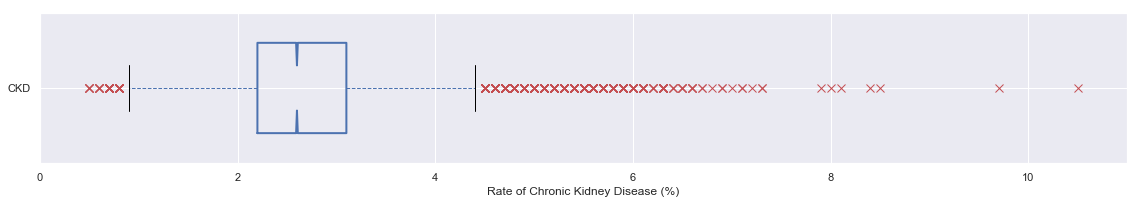

In [1225]:
plt.figure(figsize=(16,3))
cdc_full.boxplot(column='CKD', vert=False, widths=(.6), notch=True,
                 boxprops={'linestyle':'-','linewidth':2},
                 whiskerprops={'linestyle':'--'},
                 flierprops={'markeredgecolor':'r', 'marker':'x','markersize':8},
                 medianprops={'linewidth':0})

plt.xlabel('Rate of Chronic Kidney Disease (%)')
plt.tight_layout()
plt.savefig('img/ckd_boxplot.png')

In [1226]:
# print summary info on any missing data
print('Missing Data')
print('-'*50)
n = 28004

for key, val in dict(cdc_df.MeasureId.value_counts()).items():
    if n - val > 0:
        print(key + ' : ' + str(n - val) + ' | ' + '{:.2f}'.format((n-val)/n*100) + '%')

Missing Data
--------------------------------------------------
ACCESS2 : 33 | 0.12%
PAPTEST : 94 | 0.34%
COLON_SCREEN : 159 | 0.57%
MAMMOUSE : 279 | 1.00%
TEETHLOST : 405 | 1.45%
COREM : 542 | 1.94%
COREW : 553 | 1.97%


In [1240]:
complete_df.shape

(27408, 256)